## KNN e Árvore de Regressão

O objetivo deste exercício é se aprofundar nos conceitos de regressão e implementar os algoritmos de K-vizinhos mais próximos (KNN) e Árvore de Regressão.

Utilizaremos as mesmas bases de dados do exercício anterior:

In [1]:
import pandas as pd

dados_adv = pd.read_csv('../../dataset/Advertising.csv', index_col=0)

dados_por = pd.read_csv('../../dataset/Portland_housePrices.csv', index_col=None)

X = dados_por.loc[:,['tamanho']]
y = dados_por.loc[:,['preco']]

O algoritmo KNN é implementado pela classe <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html">KNeighborsRegressor</a>:

In [2]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2,weights='uniform')
neigh.fit(X,y)

KNeighborsRegressor(n_neighbors=2)

Aqui, o algoritmo é configurado com K = 2 e o peso de cada instância é definido uniformemente.

O "formato" do modelo aprendido pelo KNN é bem diferente do aprendido pela regressão linear:

Text(0, 0.5, 'Preço')

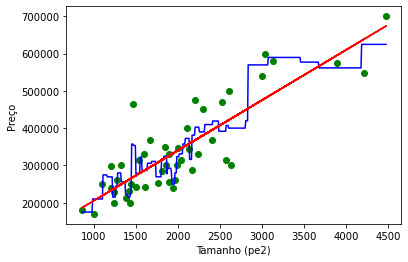

In [3]:
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
import numpy as np


linear = LinearRegression().fit(X,y)

T = np.linspace(min(X.values.ravel()),max(X.values.ravel()), 500 )[:, np.newaxis]
y_ = neigh.predict(T)


plt.scatter(X, y,color='g')
plt.plot(T, y_,color='b')
plt.plot(X, linear.predict(X),color='r')

plt.xlabel('Tamanho (pe2)')
plt.ylabel('Preço')

A parametrização K e o peso das instâncias podem ser alteradas no momento da instanciação do objeto, por exemplo:
    
```python
    neigh = KNeighborsRegressor(n_neighbors=3,weights='uniform') # K = 3, peso uniforme
    neigh = KNeighborsRegressor(n_neighbors=2,weights='distance') # K = 2, peso baseado na distância
```    

## Exercício 1

Para as duas bases de treinamento de regressão (<i>Advertising</i> e <i>Portland_housePrices</i>), avalie quais são as melhores parametrizações (use inspeção visual e RSS/R^2).
    
    

* Portland house prices

### Alvo e preditoras

In [4]:
X = dados_por.loc[:,['tamanho']]
y = dados_por.loc[:,['preco']]

### Regressor KNN

In [5]:
def T_linspace(preditoras, num):
    T_lin = np.linspace(min(preditoras.values.ravel()),max(preditoras.values.ravel()), num)[:, np.newaxis]
    return T_lin

In [6]:
def knn_parametrizado(knn, peso):
    neigh = KNeighborsRegressor(n_neighbors=knn,weights=peso)
    neigh.fit(X,y)
    y_ = neigh.predict(T)
    return y_

### Visualização

In [7]:
T = T_linspace(X, 500)

In [8]:
yu_2 = knn_parametrizado(2, 'uniform')
yu_3 = knn_parametrizado(3, 'uniform')
yu_12 = knn_parametrizado(12, 'uniform')

In [9]:
yd_2 = knn_parametrizado(2, 'distance')
yd_5 = knn_parametrizado(5, 'distance')
yd_11 = knn_parametrizado(11, 'distance')

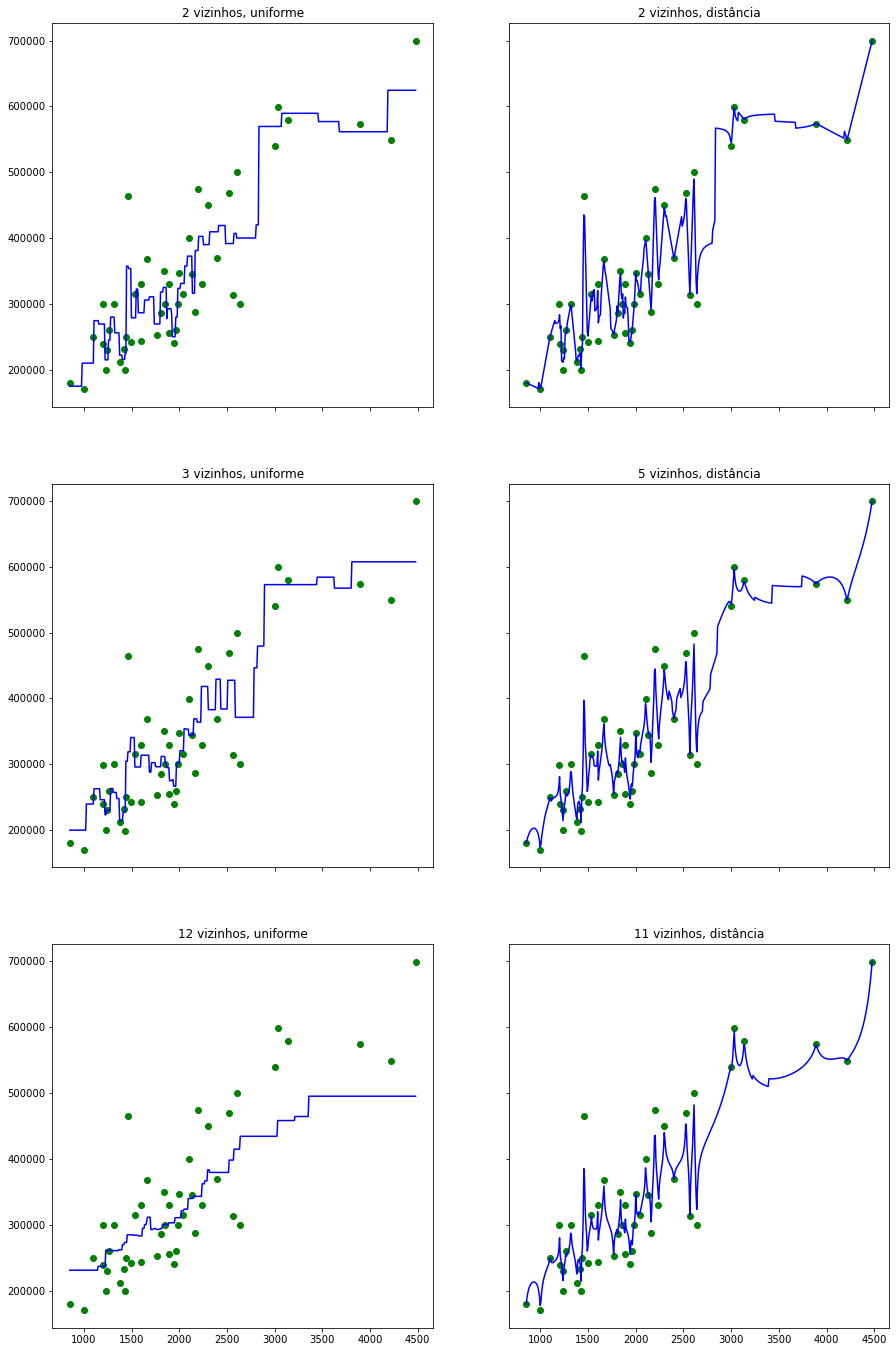

In [10]:
f, axs = plt.subplots(3, 2, sharey=True, sharex=True, figsize=(15,24))

axs[0,0].scatter(X, y,color='g')
axs[0,0].plot(T, yu_2,color='b')
axs[0,0].set_title('2 vizinhos, uniforme')
axs[1,0].scatter(X, y,color='g')
axs[1,0].plot(T, yu_3,color='b')
axs[1,0].set_title('3 vizinhos, uniforme')
axs[2,0].scatter(X, y,color='g')
axs[2,0].plot(T, yu_12,color='b')
axs[2,0].set_title('12 vizinhos, uniforme')
axs[0,1].scatter(X, y,color='g')
axs[0,1].plot(T, yd_2,color='b')
axs[0,1].set_title('2 vizinhos, distância')
axs[1,1].scatter(X, y,color='g')
axs[1,1].plot(T, yd_5,color='b')
axs[1,1].set_title('5 vizinhos, distância')
axs[2,1].scatter(X, y,color='g')
axs[2,1].plot(T, yd_11,color='b')
axs[2,1].set_title('11 vizinhos, distância')


plt.show()

### RSS/R^2

In [11]:
from sklearn.metrics import r2_score
def calc_rss(y,predicted):
    return float(((predicted - y) ** 2).sum())
    
def calc_r2(y,predicted):
    return r2_score(predicted,y)

In [12]:
T = T_linspace(X, 47)

In [13]:
df_ind_uni = pd.DataFrame(columns=['RSS', 'R2'])

for knn in range(2, 16):
    y_ = knn_parametrizado(knn, 'uniform')
    df_ind_uni.loc[knn] = knn
    df_ind_uni['RSS'].loc[knn] = calc_rss(y, y_)
    df_ind_uni['R2'].loc[knn] = calc_r2(y, y_)

In [14]:
df_ind_uni

,RSS,R2
2,2194387250759.75,-1.148366
3,2225187536964.0,-1.149773
4,2070704886970.4375,-1.283898
5,1977738543184.76001,-1.31398
6,1927043778091.444092,-1.433255
7,1635732133734.449463,-1.570198
8,1627420759408.203125,-1.682055
9,1456246978978.296387,-1.807965
10,1411987271487.750244,-1.782978
11,1346517517020.82666,-1.925901


In [15]:
df_ind_dis = pd.DataFrame(columns=['RSS', 'R2'])

for knn in range(2, 16):
    y_ = knn_parametrizado(knn, 'distance')
    df_ind_dis.loc[knn] = knn
    df_ind_dis['RSS'].loc[knn] = calc_rss(y, y_)
    df_ind_dis['R2'].loc[knn] = calc_r2(y, y_)

In [16]:
df_ind_dis

,RSS,R2
2,2250463970483.509766,-1.176809
3,2276427438800.646484,-1.181932
4,2240740254291.113281,-1.215299
5,2179306702767.88623,-1.224544
6,2159940692797.099365,-1.268282
7,2074967923287.730957,-1.283409
8,2063851432440.494141,-1.309917
9,1992445616176.005371,-1.321663
10,1963091150456.654053,-1.315264
11,1929023588835.3479,-1.337493


* Advertising

### Alvo e preditoras

In [17]:
dados_adv.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [18]:
X = dados_adv.loc[:,['TV']]
y = dados_adv.loc[:,['sales']]

### Regressor KNN

In [19]:
T = T_linspace(X, 1000)

### Visualização

In [20]:
yu_2 = knn_parametrizado(2, 'uniform')
yu_5 = knn_parametrizado(5, 'uniform')
yu_10 = knn_parametrizado(10, 'uniform')

In [21]:
yd_2 = knn_parametrizado(2, 'distance')
yd_5 = knn_parametrizado(5, 'distance')
yd_14 = knn_parametrizado(14, 'distance')

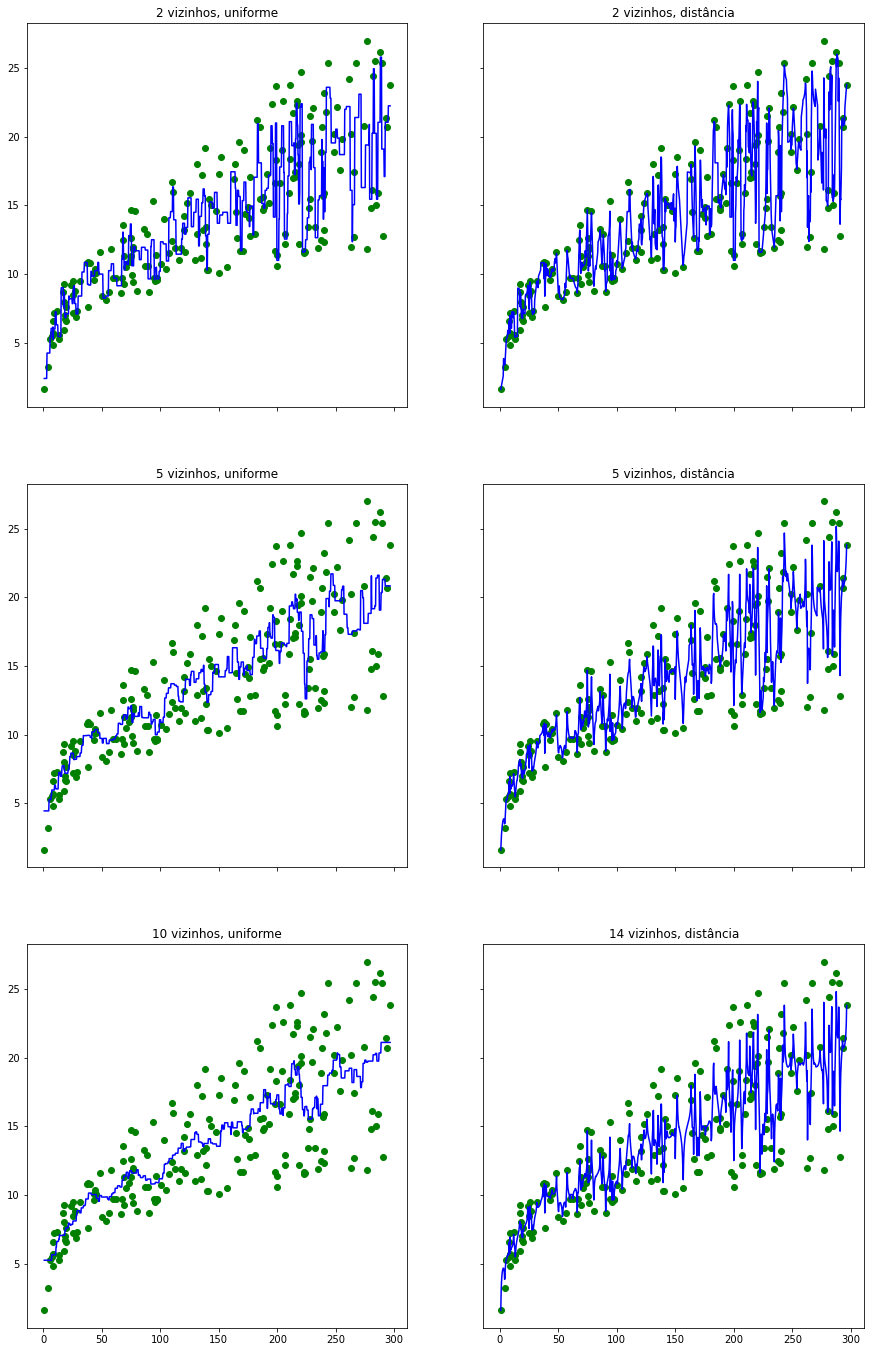

In [22]:
f, axs = plt.subplots(3, 2, sharey=True, sharex=True, figsize=(15,24))

axs[0,0].scatter(X, y,color='g')
axs[0,0].plot(T, yu_2,color='b')
axs[0,0].set_title('2 vizinhos, uniforme')
axs[1,0].scatter(X, y,color='g')
axs[1,0].plot(T, yu_5,color='b')
axs[1,0].set_title('5 vizinhos, uniforme')
axs[2,0].scatter(X, y,color='g')
axs[2,0].plot(T, yu_10,color='b')
axs[2,0].set_title('10 vizinhos, uniforme')
axs[0,1].scatter(X, y,color='g')
axs[0,1].plot(T, yd_2,color='b')
axs[0,1].set_title('2 vizinhos, distância')
axs[1,1].scatter(X, y,color='g')
axs[1,1].plot(T, yd_5,color='b')
axs[1,1].set_title('5 vizinhos, distância')
axs[2,1].scatter(X, y,color='g')
axs[2,1].plot(T, yd_14,color='b')
axs[2,1].set_title('14 vizinhos, distância')


plt.show()

### RSS/R^2

In [23]:
T = T_linspace(X, len(y))

In [24]:
df_ind_uni = pd.DataFrame(columns=['RSS', 'R2'])

for knn in range(2, 51):
    y_ = knn_parametrizado(knn, 'uniform')
    df_ind_uni.loc[knn] = knn
    df_ind_uni['RSS'].loc[knn] = calc_rss(y, y_)
    df_ind_uni['R2'].loc[knn] = calc_r2(y, y_)

In [25]:
df_ind_uni

,RSS,R2
2,9951.37,-1.23752
3,9455.867778,-1.452676
4,9391.788125,-1.654679
5,9385.8148,-1.713795
6,9376.994167,-1.667459
7,9266.670408,-1.668831
8,9126.160156,-1.719478
9,9057.926296,-1.752823
10,9117.0702,-1.73772
11,9101.099091,-1.76802


In [26]:
df_ind_dis = pd.DataFrame(columns=['RSS', 'R2'])

for knn in range(2, 51):
    y_ = knn_parametrizado(knn, 'distance')
    df_ind_dis.loc[knn] = knn
    df_ind_dis['RSS'].loc[knn] = calc_rss(y, y_)
    df_ind_dis['R2'].loc[knn] = calc_r2(y, y_)

In [27]:
df_ind_dis

,RSS,R2
2,10165.476771,-1.06267
3,9771.988445,-1.189496
4,9620.274907,-1.270886
5,9557.538322,-1.316074
6,9486.848415,-1.329614
7,9418.375359,-1.338718
8,9387.889472,-1.357803
9,9353.003768,-1.372899
10,9335.368029,-1.383738
11,9325.530471,-1.393732


---

## Árvore de Regressão

A árvore de decisão é implementada através da classe <a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html">DecisionTreeRegressor</a>.


In [28]:
X = dados_por.loc[:,['tamanho']]
y = dados_por.loc[:,['preco']]

In [29]:
from sklearn.tree import DecisionTreeRegressor  
#Regression tree
# create a regressor object 
tree = DecisionTreeRegressor()  

# fit the regressor with X and Y data 
tree.fit(X, y) 

DecisionTreeRegressor()

In [30]:
T = T_linspace(X, len(y))

Text(0, 0.5, 'Preço')

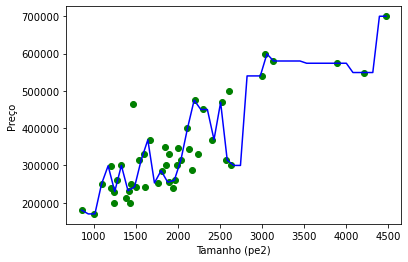

In [31]:
plt.scatter(X, y,color='g')
y_t = tree.predict(T)
plt.plot(T, y_t,color='b')

plt.xlabel('Tamanho (pe2)')
plt.ylabel('Preço')

É possível também gerar a árvore resultante para visualização:

In [32]:
from sklearn.tree import export_graphviz  
 

export_graphviz(tree, out_file ='tree.dot', 
               feature_names =['Tamanho'])

Este código irá gerar um arquivo <b>tree.dot</b>.

Esse arquivo pode ser visualizado no site <a href='http://www.webgraphviz.com/'>http://www.webgraphviz.com</a>

## Exercício 2

Qual seria o melhor método para montar um modelo em cada uma das bases com Árvore de Decisão?

Utilizar apenas um atributo? multiplos? quais seriam?

* Portland house price

### Usando apenas o 'Tamanho'

In [33]:
T = T_linspace(X, len(y))

In [34]:
y_t = tree.predict(T)

In [35]:
rss = calc_rss(y.values.ravel(), y_t)
r2 = calc_r2(y, y_t)

print('Utilizando apenas o tamanho:')
print(f'RSS = {rss}')
print(f'R2 = {r2}')

Utilizando apenas o tamanho:
RSS = 2316797944407.0
R2 = -1.1046228167917551


### Usando múltiplos atributos

In [36]:
dados_por.columns

Index(['tamanho', 'quartos', 'preco'], dtype='object')

In [37]:
Xm = dados_por.loc[:,['tamanho', 'quartos']]
y = dados_por.loc[:,['preco']]

In [38]:
tree_m = DecisionTreeRegressor()  
tree_m.fit(Xm, y) 

DecisionTreeRegressor()

In [39]:
y_t = tree_m.predict(Xm)

In [40]:
rss = calc_rss(y.values.ravel(), y_t)
r2 = calc_r2(y, y_t)

print('Utilizando todos os atributos:')
print(f'RSS = {rss}')
print(f'R2 = {r2}')

Utilizando todos os atributos:
RSS = 0.0
R2 = 1.0


* Advertising

In [41]:
dados_adv.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [42]:
Xm = dados_adv.loc[:,['TV', 'radio', 'newspaper']]
y = dados_adv.loc[:,['sales']]

In [43]:
tree_m = DecisionTreeRegressor()
tree_m.fit(Xm, y)

DecisionTreeRegressor()

In [44]:
y_t = tree_m.predict(Xm)

In [45]:
rss = calc_rss(y.values.ravel(), y_t)
r2 = calc_r2(y, y_t)

print('Utilizando todos os atributos:')
print(f'RSS = {rss}')
print(f'R2 = {r2}')

Utilizando todos os atributos:
RSS = 0.0
R2 = 1.0


---

## Comparação entre modelos

Agora já sabemos como implementar um modelo linear multivariado:

```python
from sklearn.linear_model import LinearRegression
linear = LinearRegression().fit(X,y)
```

como implementar o regressor KNN:

```python
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor().fit(X,y)
```

e como implementar uma árvore de regressão:

```python
from sklearn.tree import DecisionTreeRegressor  
tree = DecisionTreeRegressor().fit(X,y)
```

Conhecemos todos os algoritmos e seus parâmetros, agora como decidir <b>qual</b> deles usar efetivamente? Olhar o <i>fitting</i> em sua base de dados e tomar isso como verdade absoluta pode ser completamente enganoso.

Podemos tentar <i>aliviar</i> esse problema fazendo uma comparação mais inteligente

## Exercício 3

1) Separe as bases <i>Portland_housePrices</i> e <i>Advertising</i> em conjuntos de <i>treinamento</i> e <i>teste</i> (30% das instâncias para teste e 70% para treinamento).

2) Utilize as bases de treinamento para treinar os modelos a serem avaliados, e as bases de teste para avaliar o desempenho regressor dos modelos.

3) Qual é o melhor modelo para cada problema? Por que você fez essa recomendação? (mostre métricas, gráficos, ou as evidências que julgar necessárias).

* Portland house prices

### Preparando as partições

In [46]:
Xm = dados_por.loc[:,['tamanho', 'quartos']]
y = dados_por.loc[:,['preco']]

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(Xm, y, test_size=0.3, random_state=42)

### Treinando os modelos

In [49]:
linear = LinearRegression().fit(X_train, y_train)

neigh = KNeighborsRegressor(n_neighbors=3, weights='uniform').fit(X_train, y_train)

tree = DecisionTreeRegressor().fit(X_train, y_train)

### Testando os modelos

In [50]:
y_l = linear.predict(X_test)

y_n = neigh.predict(X_test)

y_t = tree.predict(X_test)

#### Indicadores

In [51]:
rss_l = calc_rss(y_test.values.ravel(), y_l)
r2_l = calc_r2(y_test, y_l)

rss_n = calc_rss(y_test.values.ravel(), y_n)
r2_n = calc_r2(y_test, y_n)

rss_t = calc_rss(y_test.values.ravel(), y_t)
r2_t = calc_r2(y_test, y_t)

In [52]:
print('Regressão linear:')
print(f'RSS = {rss_l}')
print(f'R^2 = {r2_l}')

print('Regressão KNN:')
print(f'RSS = {rss_n}')
print(f'R^2 = {r2_n}')

print('Árvore de regressão:')
print(f'RSS = {rss_t}')
print(f'R^2 = {r2_t}')

Regressão linear:
RSS = 7535175200208.205
R^2 = 0.3654803072202143
Regressão KNN:
RSS = 7151091632707.0
R^2 = -1.0584427256538702
Árvore de regressão:
RSS = 325174641802.0
R^2 = -1.931654128964721


#### Resíduos

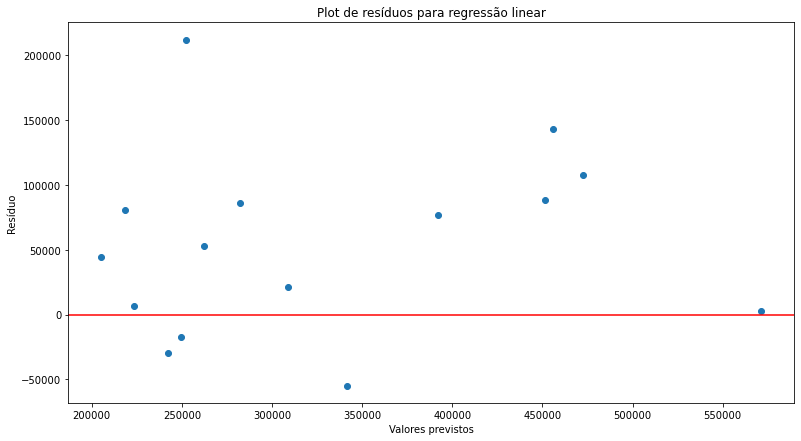

In [53]:
# y_pred = pd.DataFrame(y_l, columns=['preco'])
residuals = y_test - y_l

plt.figure(figsize=(13,7))
plt.scatter(y_l, residuals)
plt.axhline(y=0, color='r', linestyle='-')

plt.title('Plot de resíduos para regressão linear')
plt.xlabel('Valores previstos')
plt.ylabel('Resíduo')

plt.show()

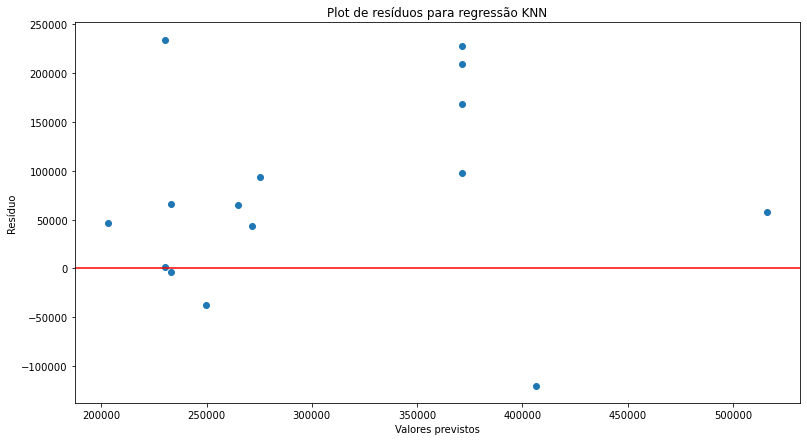

In [54]:
# y_pred = pd.DataFrame(y_l, columns=['preco'])
residuals = y_test - y_n

plt.figure(figsize=(13,7))
plt.scatter(y_n, residuals)
plt.axhline(y=0, color='r', linestyle='-')

plt.title('Plot de resíduos para regressão KNN')
plt.xlabel('Valores previstos')
plt.ylabel('Resíduo')

plt.show()

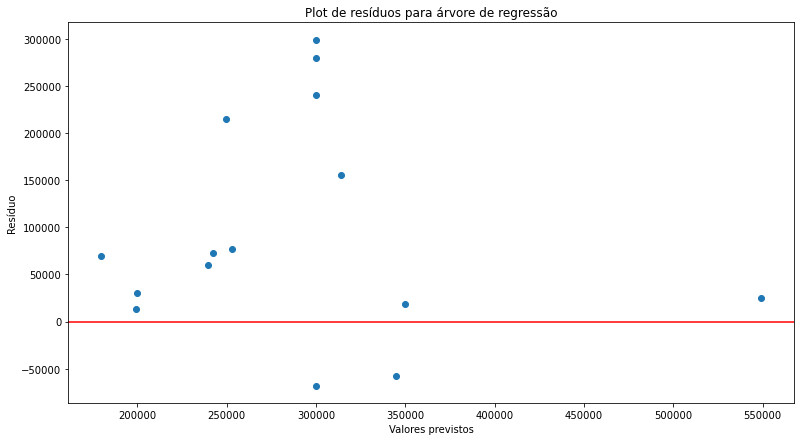

In [55]:
# y_pred = pd.DataFrame(y_l, columns=['preco'])
residuals = y_test - np.reshape(y_t, (15,1))

plt.figure(figsize=(13,7))
plt.scatter(y_t, residuals)
plt.axhline(y=0, color='r', linestyle='-')

plt.title('Plot de resíduos para árvore de regressão')
plt.xlabel('Valores previstos')
plt.ylabel('Resíduo')

plt.show()

* Advertising

### Preparando as partições

In [56]:
dados_adv.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [57]:
Xm = dados_adv.loc[:,['TV', 'radio', 'newspaper']]
y = dados_adv.loc[:,['sales']]

In [58]:
X_train, X_test, y_train, y_test = train_test_split(Xm, y, test_size=0.3, random_state=42)

### Treinando os modelos

In [59]:
linear = LinearRegression().fit(X_train, y_train)

neigh = KNeighborsRegressor(n_neighbors=5, weights='uniform').fit(X_train, y_train)

tree = DecisionTreeRegressor().fit(X_train, y_train)

### Testando os modelos

In [60]:
y_l = linear.predict(X_test)

y_n = neigh.predict(X_test)

y_t = tree.predict(X_test)

#### Indicadores

In [61]:
rss_l = calc_rss(y_test.values.ravel(), y_l)
r2_l = calc_r2(y_test, y_l)

rss_n = calc_rss(y_test.values.ravel(), y_n)
r2_n = calc_r2(y_test, y_n)

rss_t = calc_rss(y_test.values.ravel(), y_t)
r2_t = calc_r2(y_test, y_t)

In [62]:
print('Regressão linear:')
print(f'RSS = {rss_l}')
print(f'R^2 = {r2_l}')

print('Regressão KNN:')
print(f'RSS = {rss_n}')
print(f'R^2 = {r2_n}')

print('Árvore de regressão:')
print(f'RSS = {rss_t}')
print(f'R^2 = {r2_t}')

Regressão linear:
RSS = 187506.021283378
R^2 = 0.8467730707328175
Regressão KNN:
RSS = 191666.172
R^2 = 0.9022903252894043
Árvore de regressão:
RSS = 98.32000000000008
R^2 = 0.9473911900041121


#### Resíduos

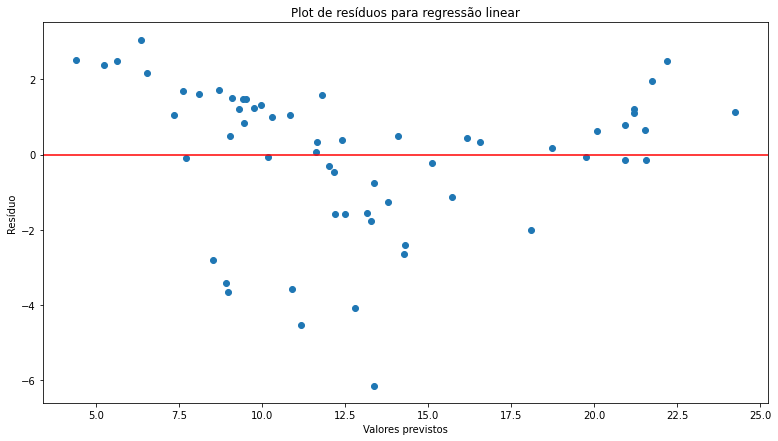

In [63]:
# y_pred = pd.DataFrame(y_l, columns=['preco'])
residuals = y_test - y_l

plt.figure(figsize=(13,7))
plt.scatter(y_l, residuals)
plt.axhline(y=0, color='r', linestyle='-')

plt.title('Plot de resíduos para regressão linear')
plt.xlabel('Valores previstos')
plt.ylabel('Resíduo')

plt.show()

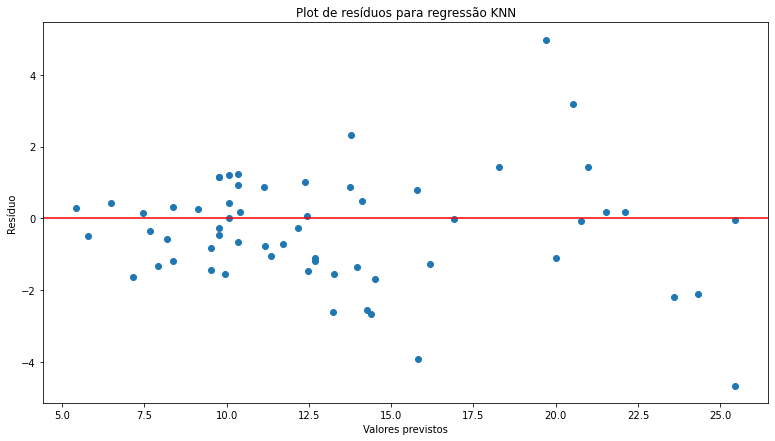

In [64]:
# y_pred = pd.DataFrame(y_l, columns=['preco'])
residuals = y_test - y_n

plt.figure(figsize=(13,7))
plt.scatter(y_n, residuals)
plt.axhline(y=0, color='r', linestyle='-')

plt.title('Plot de resíduos para regressão KNN')
plt.xlabel('Valores previstos')
plt.ylabel('Resíduo')

plt.show()

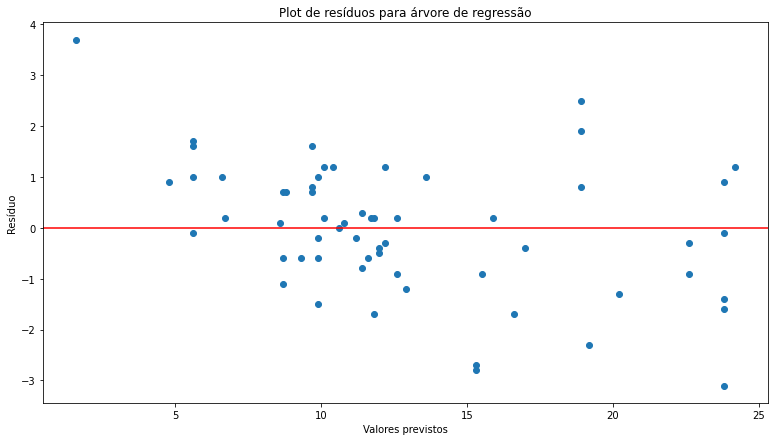

In [68]:
# y_pred = pd.DataFrame(y_l, columns=['preco'])
residuals = y_test - np.reshape(y_t, (60,1))

plt.figure(figsize=(13,7))
plt.scatter(y_t, residuals)
plt.axhline(y=0, color='r', linestyle='-')

plt.title('Plot de resíduos para árvore de regressão')
plt.xlabel('Valores previstos')
plt.ylabel('Resíduo')

plt.show()